In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression

> Goal is to find a function $f(x)$ that approximates the data points $(x_i,y_i)$ this function depends linearly on the parameters $a_j$.

**Example:** Modelling the correspondence between initial speed $v$ and length of breaking distance $w$ for a car. We have a quadratic model

$$w(v) = \alpha + \beta v + \gamma v^2$$

where $\alpha, \beta, \gamma$ are the parameters to be determined. We now take measurements $(v_i,w_i)$ and then minimize the sum of squares

$$f(\alpha, \beta, \gamma) = \sum_{i=1}^m (w_i - (\alpha + \beta v_i + \gamma v_i^2))^2$$

A minimum is determined by setting the gradient to zero, and the Hessian matrix should be positive definite.

## Formulation of the Linear System

We can reformulate the problem into a matrix form. We define:

$$A = \begin{pmatrix}
1 & v_1 & v_1^2 \\
1 & v_2 & v_2^2 \\
\vdots & \vdots & \vdots \\
1 & v_m & v_m^2
\end{pmatrix}, \quad x = \begin{pmatrix}
\alpha \\ \beta \\ \gamma
\end{pmatrix}, \quad b = \begin{pmatrix}
w_1 \\ w_2 \\ \vdots \\ w_m
\end{pmatrix}$$

And then we can write the minimization problem as

$$f(x) = \|Ax - b\|_2^2$$

### Determining the Normal Equations

If we calculate the gradient of this function we get the normal equations

$$grad f(x) = 2A^T(Ax - b) = 0 \implies A^TAx = A^Tb$$

The Hessian matrix is here given by 

$$Hess f(x) = 2A^TA$$

**Theorem:** If $A$ has full rank, then the normal equations $A^TAx = A^Tb$ have one unique solution $x^*$. This solution is the minimizer of $f(x) = \|Ax - b\|_2^2$.

Design Matrix A:
[[1.000e+00 9.000e+00 8.100e+01]
 [1.000e+00 1.700e+01 2.890e+02]
 [1.000e+00 1.700e+01 2.890e+02]
 [1.000e+00 2.500e+01 6.250e+02]
 [1.000e+00 3.500e+01 1.225e+03]]
Observation Vector b:
[ 3  9  5 14 23]
A^T * A:
[[5.000000e+00 1.030000e+02 2.509000e+03]
 [1.030000e+02 2.509000e+03 6.905500e+04]
 [2.509000e+03 6.905500e+04 2.064853e+06]]
A^T * b:
[   54.  1420. 41214.]
Solution x (coefficients):
[-0.52475881  0.25901223  0.01193525]


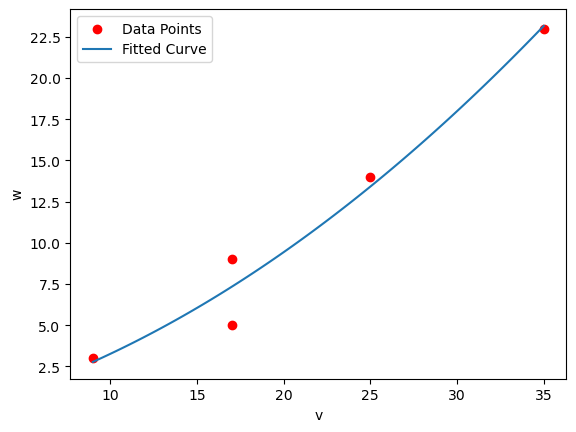

In [2]:
# Table of w, and v data

w = np.array([3,9,5,14,23])
v = np.array([9, 17, 17, 25, 35])

# Model is w(v) = alpha + beta * v + gamma * v^2 
# First determine the design matrix

A = np.vstack([np.ones(len(v)), v, v**2]).T
b = w

print("Design Matrix A:")
print(A)
print("Observation Vector b:")
print(b)

# Determine the normal equations
AtA = A.T @ A
Atb = A.T @ b

print("A^T * A:")
print(AtA)
print("A^T * b:")
print(Atb)
# Solve the normal equations
x = np.linalg.solve(AtA, Atb)

print("Solution x (coefficients):")
print(x)

# Plot the data and the fitted curve
v_fit = np.linspace(min(v), max(v), 100)
w_fit = x[0] + x[1] * v_fit + x[2] * v_fit**2 
plt.scatter(v, w, color='red', label='Data Points')
plt.plot(v_fit, w_fit, label='Fitted Curve')
plt.xlabel('v')
plt.ylabel('w')
plt.legend()
plt.show()


**Some remarks:** 

+ If the rank of $A$ s not maximal the solution of the Minimization problem is not unique often the following problem is solved instead

$$||Ax - b||_2 \to \min, \quad ||x||_2 \to \min$$

+ In terms of the condition $k_2(A^TA) = k_2(A)^2$ so the condition of the normal equations is worse than the condition of $A$. This means that if $A$ is ill-conditioned the normal equations are even more ill-conditioned.

## QR Decomposition

A numerical problem of the normal equations is that the condition is squared. A better way to solve this least squares problem is to use the QR decomposition of $A$

**Definition** Let $A$ be a $m \times n$ matrix with $m \geq n$. The $QR$ decomposition into an orthogonal matrix $Q \in \mathbb{R}^{m \times m}$ and an upper triangular matrix $R \in \mathbb{R}^{m \times n}$ is given by $A = QR$.

$$R = \begin{pmatrix} R' \\ 0 \end{pmatrix}$$

where $R' \in \mathbb{R}^{n \times n}$ is upper triangular.



**Implementation of QR with Gram-Schmidt**

For this we consider a matrix with columns $a_1,...a_n$ and the innter product $<x,y> = x^T y$. We then define the projection $proj_u(a) = \frac{<u,a>}{<u,u>}u$.

1. Set $q_1 = \frac{a_1}{||a_1||_2}$
2. For $j = 2,...,n$ do
   1. Set $\tilde{q}_j = a_j - \sum_{i=1}^{j-1} proj_{q_i}(a_j)$
   2. Set $q_j = \frac{\tilde{q}_j}{||\tilde{q}_j||_2}$
3. Set $Q = (q_1,...,q_n)$ and $R = Q^TA$


In [3]:
def qr_gram_schmidt(A):
    """ 
    Performs a QR Decomposition of the Matrix A using the Gram-Schmidt process
    """
    m,n = A.shape
    Q = np.zeros((m,n))
    R = np.zeros((n,n))
    for j in range(n):
        # Extract the j-th column of A
        v = A[:,j]
        for i in range(j):
            # Compute the projection of A[:,j] onto Q[:,i]
            R[i,j] = np.dot(Q[:,i], A[:,j])
            v = v - R[i,j] * Q[:,i]
        R[j,j] = np.linalg.norm(v)
        Q[:,j] = v / R[j,j]
    return Q, R

# Example
A = np.array([[12, -51, 4],
              [6, 167, -68],
              [-4, 24, -41]])

Q, R = qr_gram_schmidt(A)
print("Matrix Q:")
print(Q)
print("Matrix R:")
print(R)

Matrix Q:
[[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]
Matrix R:
[[ 14.  21. -14.]
 [  0. 175. -70.]
 [  0.   0.  35.]]


**Theorem** If $A$ is a $m \times n$ matrix with $rank(A) = n$ and $Q$ is an orthogonal matrix $m \times m$ with $Q^T A = R = \begin{pmatrix} R' \\ 0 \end{pmatrix}$ where $R' \in \mathbb{R}^{n \times n}$ is upper triangular. Then we can solve the normal equations $A^TAx = A^Tb$ using this QR decomposition

+ $((QR)^T QR)x = (QR)^Tb$
+ $R^T Q^T Q R x = R^T Q^T b$
+ $R^T R x = R^T Q^T b$
+ $Rx = Q^T b$



Solution x using QR (coefficients):
[-0.52475881  0.25901223  0.01193525]


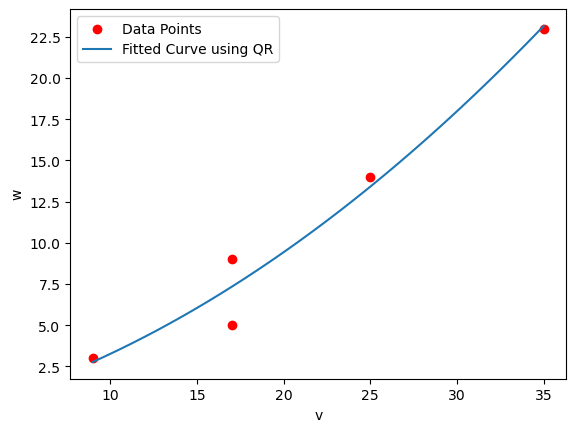

In [4]:
# Use the same example as in the top but use QR decomposition
v = np.array([9, 17, 17, 25, 35])
w = np.array([3,9,5,14,23])

A = np.vstack([np.ones(len(v)), v, v**2]).T
b = w

Q,R = qr_gram_schmidt(A)
Qt_b = Q.T @ b
x_qr = np.linalg.solve(R, Qt_b)
print("Solution x using QR (coefficients):")
print(x_qr)

# Plot the data and the fitted curve using QR
v_fit = np.linspace(min(v), max(v), 100)
w_fit_qr = x_qr[0] + x_qr[1] * v_fit + x_qr[2] * v_fit**2 
plt.scatter(v, w, color='red', label='Data Points')
plt.plot(v_fit, w_fit_qr, label='Fitted Curve using QR')
plt.xlabel('v')
plt.ylabel('w')
plt.legend()
plt.show()

### QR Decomposition using Householder Reflections

A Householder reflection is a linear transformation that reflects a vector about a plane or a hyperplane.

$$H = I - 2 uu^T$$

where $u$ is a unit vector orthogonal to the plane of reflection.

**Algorithm: QR Decomposition using Householder Reflections**

First we want a Householder matrix $H_1 = I - 2u_1u_1^T$ such that 

$$H_1 A = \begin{pmatrix} \alpha_1 & ... & ...& \\ 0 & ... & ... \\ 0 & ...& ... \end{pmatrix}$$

In order to achieve this we know that $H_1A_{-,1} = A_{-,1} - 2u_1u_1^TA_{-,1} = \alpha_1 e_1$ which means we determine $u_1 = c * (A_{-,1} - \alpha_1 e_1)$ where $c$ is a normalization constant such that $||u_1||_2 = 1$. We choose $\alpha_1 = -sign(A_{1,1}) ||A_{-,1}||_2$ to avoid cancellation errors.

We then repeat this process for the submatrix $A_{2:,2:}$ and so on. We get the following algorithm
1. Set $A^{(1)} = A$
2. For $k = 1,...,min(m-1,n)$ do
   1. Set $\alpha_k = -sign(A^{(k)}_{k,k}) ||A^{(k)}_{k:,k}||_2$
   2. Set $u_k = A^{(k)}_{k:,k} - \alpha_k e_1$ and normalize $u_k = \frac{u_k}{||u_k||_2}$
   3. Set $H_k = I - 2 \begin{pmatrix} 0 & 0 \\ 0 & u_k u_k^T \end{pmatrix}$
   4. Set $A^{(k+1)} = H_k A^{(k)}$
3. Set $R = A^{(min(m-1,n)+1)}$ and $Q = H_1 H_2 ... H_{min(m-1,n)}$

In [5]:
def householder_qr(A):
    """ 
    Performs a QR Decomposition of the Matrix A using Householder Reflections
    """
    A = A.astype(float)
    m,n = A.shape

    # Initialize Q as Identity Matrix
    Q = np.eye(m)
    R = A.copy()

    # Max number of reflections is min(m-1,n)
    k_max = min(m-1,n)
    for k in range(k_max):
        print(f"Iteration {k+1}/{k_max}")

        # Extract the k-th column from row k to end
        x = R[k:,k].copy()
        print(f"Vector x:\n{x}")

        if np.allclose(x[1:], 0):
            print("No reflection needed, continuing to next iteration.")
            continue

        # Compute alpha = -sign(x[0]) * ||x||_2)
        alpha = -np.sign(x[0]) * np.linalg.norm(x)
        print(f"Alpha: {alpha}")
        # Compute u = x - alpha *e1
        e1 = np.zeros_like(x)
        e1[0] = 1.0
        u = x - alpha * e1
        u_norm = np.linalg.norm(u)
        if u_norm > 1e-12:
            u = u / u_norm
        print(f"Vector u (normalized):\n{u}")

        # Apply the Householder Transformation to R
        # Update the rows
        R_sub = R[k:, k:]
        print(f"Submatrix R before transformation:\n{R_sub}")
        R[k:,k:] = R_sub - 2 * np.outer(u, u @ R_sub)
        print(f"Submatrix R after transformation:\n{R[k:,k:]}")

        # Update Q
        Q_sub = Q[:, k:]
        Q[:,k:] = Q_sub - 2 * np.outer(Q_sub @ u, u)

    return Q, R

A = np.array([[12, -51, 4],
              [6, 167, -68],
              [-4, 24, -41]], dtype=float)
Q, R = householder_qr(A)


Iteration 1/2
Vector x:
[12.  6. -4.]
Alpha: -14.0
Vector u (normalized):
[ 0.96362411  0.22237479 -0.14824986]
Submatrix R before transformation:
[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]
Submatrix R after transformation:
[[-14.         -21.          14.        ]
 [  0.         173.92307692 -65.69230769]
 [  0.          19.38461538 -42.53846154]]
Iteration 2/2
Vector x:
[173.92307692  19.38461538]
Alpha: -175.0
Vector u (normalized):
[0.99846035 0.05547002]
Submatrix R before transformation:
[[173.92307692 -65.69230769]
 [ 19.38461538 -42.53846154]]
Submatrix R after transformation:
[[-1.75000000e+02  7.00000000e+01]
 [-3.55271368e-15 -3.50000000e+01]]


In [6]:
print("Matrix Q from Householder:")
print(Q)
print("Matrix R from Householder:")
print(R)
print("Check Q^T Q (should be Identity):")
print(Q.T @ Q)
print("Check QR (should be A):")
print(Q @ R)

Matrix Q from Householder:
[[-0.85714286  0.39428571  0.33142857]
 [-0.42857143 -0.90285714 -0.03428571]
 [ 0.28571429 -0.17142857  0.94285714]]
Matrix R from Householder:
[[-1.40000000e+01 -2.10000000e+01  1.40000000e+01]
 [ 0.00000000e+00 -1.75000000e+02  7.00000000e+01]
 [ 0.00000000e+00 -3.55271368e-15 -3.50000000e+01]]
Check Q^T Q (should be Identity):
[[ 1.00000000e+00  9.02056208e-17  1.11022302e-16]
 [ 9.02056208e-17  1.00000000e+00 -5.55111512e-17]
 [ 1.11022302e-16 -5.55111512e-17  1.00000000e+00]]
Check QR (should be A):
[[ 12. -51.   4.]
 [  6. 167. -68.]
 [ -4.  24. -41.]]


# Nonlinear Regression usign the Gauss-Newton Method

Given $m$ functions $r = (r_1,..,r_m)$ (called residuals) of $n$ variables $\beta = (\beta_1, ..., \beta_n)$ with $m \geq n$ the Gauss-Newton algortithm iteratively finds the value of $\beta$ that minimizes the sum of squares

$$S(\beta) = \sum_{i=1}^m r_i(\beta)^2 = ||r(\beta)||_2^2$$

Starting with an initial guess $\beta^{(0)}$ the method proceeds by iterations

$$\beta^{(s+1)} = \beta^{(s)} - (J_r(\beta^{(s)})^T J_r(\beta^{(s)}))^{-1} J_r(\beta^{(s)})^T r(\beta^{(s)})$$

where $J_r(\beta)$ is the Jacobian matrix of $r$ at $\beta$.

The increment is obtained by solving the linear equation

+ $\Delta = -(J_r^T J_r)^{-1} J_r^T r(\beta^{(s)})$
+ $J_r^T J_r \Delta = -J_r^T r(\beta^{(s)})$

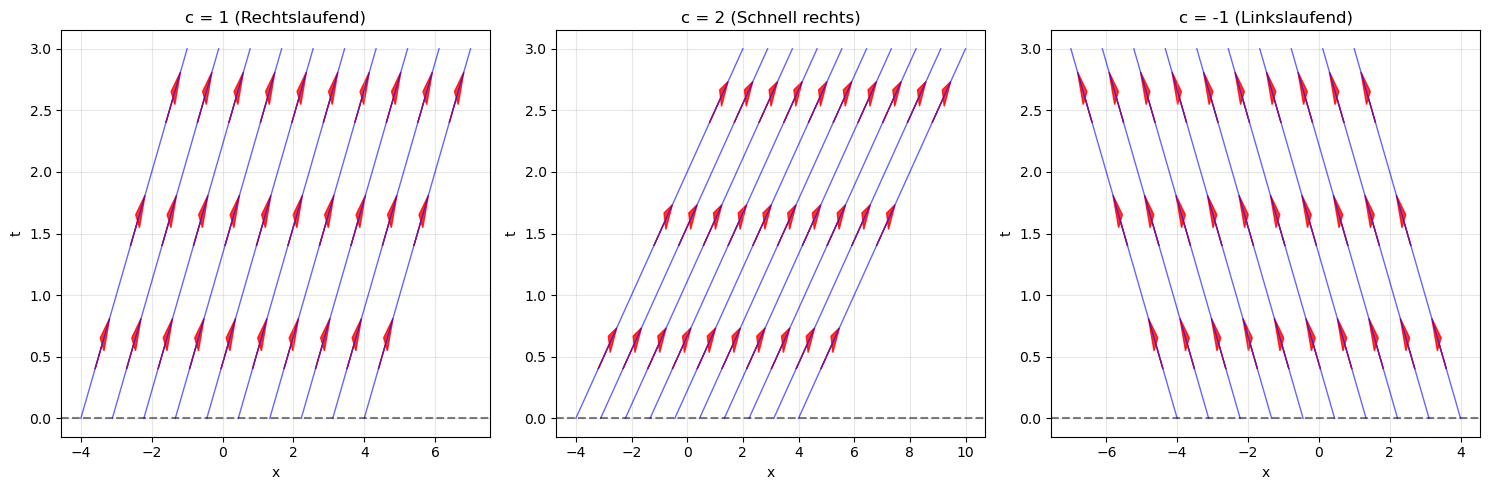

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def plot_characteristic_field(c=2, x_range=(-5, 5), t_range=(0, 4)):
    """
    Visualisiert das charakteristische Vektorfeld für die Transportgleichung
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Charakteristische Linien zeichnen
    for x0 in np.linspace(x_range[0], x_range[1], 15):
        t_vals = np.linspace(t_range[0], t_range[1], 100)
        x_vals = x0 + c * t_vals
        ax.plot(x_vals, t_vals, 'b-', alpha=0.7, linewidth=1)
        
        # Pfeile entlang der Charakteristiken
        for t in np.linspace(t_range[0], t_range[1], 6):
            if t > t_range[0]:
                ax.arrow(x0 + c*(t-0.1), t-0.1, 
                        c*0.2, 0.2, 
                        head_width=0.1, head_length=0.2, 
                        fc='red', ec='red', alpha=0.8)
    
    # Vektorfeld plotten
    X, T = np.meshgrid(np.linspace(x_range[0], x_range[1], 15),
                      np.linspace(t_range[0], t_range[1], 10))
    
    # Das Vektorfeld ist (1, c) - konstant!
    U = np.ones_like(X)  # dt/ds = 1
    V = c * np.ones_like(X)  # dx/ds = c
    
    # Vektorfeld normalisieren für bessere Darstellung
    magnitude = np.sqrt(U**2 + V**2)
    U_norm = U / magnitude
    V_norm = V / magnitude
    
    ax.quiver(X, T, U_norm, V_norm, color='green', scale=15, width=0.01, alpha=0.7)
    
    ax.set_xlabel('x (Raum)')
    ax.set_ylabel('t (Zeit)')
    ax.set_title(f'Charakteristiken für Transportgleichung (c = {c})')
    ax.grid(True, alpha=0.3)
    
    # Anfangsbedingung bei t=0 markieren
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5, label='Anfangsbedingung t=0')
    ax.legend()
    
    plt.tight_layout()
    return fig, ax

# Plots für verschiedene c-Werte erstellen
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

c_values = [1, 2, -1]
titles = ['c = 1 (Rechtslaufend)', 'c = 2 (Schnell rechts)', 'c = -1 (Linkslaufend)']

for i, (c, title) in enumerate(zip(c_values, titles)):
    ax = axes[i]
    
    # Charakteristische Linien
    for x0 in np.linspace(-4, 4, 10):
        t_vals = np.linspace(0, 3, 100)
        x_vals = x0 + c * t_vals
        ax.plot(x_vals, t_vals, 'b-', alpha=0.6, linewidth=1)
        
        # Einige Pfeile
        for t in [0.5, 1.5, 2.5]:
            if 0 <= t <= 3:
                ax.arrow(x0 + c*(t-0.1), t-0.1, 
                        c*0.2, 0.2, 
                        head_width=0.15, head_length=0.3, 
                        fc='red', ec='red', alpha=0.8)
    
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()